In [1]:
import numpy as np
import math
import glob
import sys
import sklearn 

import matplotlib.pyplot as plt

import PrimaryTierFileHelper

In [2]:
###########################################################
# Define mode
###########################################################
isTrackMode = False

In [3]:
###########################################################
# Define file
###########################################################

#file = 'ccnutree_0'

file = 'ccnutree_1'

fileNames = glob.glob('/Users/isobel/Desktop/DUNE/2024/Hierarchy/HigherTier/files/' + file + '.root')

if (isTrackMode) : 
    trainVarFile = '/Users/isobel/Desktop/DUNE/2024/Hierarchy/files/' + file + '_track.npz'
else :
    trainVarFile = '/Users/isobel/Desktop/DUNE/2024/Hierarchy/files/' + file + '_shower.npz'

print('fileNames:', fileNames)
print('trainVarFile:', trainVarFile)

fileNames: ['/Users/isobel/Desktop/DUNE/2024/Hierarchy/HigherTier/files/ccnutree_1.root']
trainVarFile: /Users/isobel/Desktop/DUNE/2024/Hierarchy/files/ccnutree_1_track.npz


In [4]:
###########################################################
# Read tree
###########################################################
#nLinks, variables, y = PrimaryTierFileHelper.readTree(fileNames)

if (isTrackMode) :
    nLinks, variables, y, isTruePrimaryLink, isLinkOrientationCorrect, trainingCutDCA, hasNeutronParent = PrimaryTierFileHelper.readTreeGroupLinks_track(fileNames)
else :
    nLinks, variables, y, isTruePrimaryLink, isLinkOrientationCorrect, trainingCutDCA, hasNeutronParent = PrimaryTierFileHelper.readTreeGroupLinks_shower(fileNames)

Reading tree:  /Users/isobel/Desktop/DUNE/2024/Hierarchy/HigherTier/files/ccnutree_1.root , This may take a while...
iEvent: 0/143200
iEvent: 100/143200
iEvent: 200/143200
iEvent: 300/143200
iEvent: 400/143200
iEvent: 500/143200
iEvent: 600/143200
iEvent: 700/143200
iEvent: 800/143200
iEvent: 900/143200
iEvent: 1000/143200
iEvent: 1100/143200
iEvent: 1200/143200
iEvent: 1300/143200
iEvent: 1400/143200
iEvent: 1500/143200
iEvent: 1600/143200
iEvent: 1700/143200
iEvent: 1800/143200
iEvent: 1900/143200
iEvent: 2000/143200
iEvent: 2100/143200
iEvent: 2200/143200
iEvent: 2300/143200
iEvent: 2400/143200
iEvent: 2500/143200
iEvent: 2600/143200
iEvent: 2700/143200
iEvent: 2800/143200
iEvent: 2900/143200
iEvent: 3000/143200
iEvent: 3100/143200
iEvent: 3200/143200
iEvent: 3300/143200
iEvent: 3400/143200
iEvent: 3500/143200
iEvent: 3600/143200
iEvent: 3700/143200
iEvent: 3800/143200
iEvent: 3900/143200
iEvent: 4000/143200
iEvent: 4100/143200
iEvent: 4200/143200
iEvent: 4300/143200
iEvent: 4400/14

iEvent: 39000/143200
iEvent: 39100/143200
iEvent: 39200/143200
iEvent: 39300/143200
iEvent: 39400/143200
iEvent: 39500/143200
iEvent: 39600/143200
iEvent: 39700/143200
iEvent: 39800/143200
iEvent: 39900/143200
iEvent: 40000/143200
iEvent: 40100/143200
iEvent: 40200/143200
iEvent: 40300/143200
iEvent: 40400/143200
iEvent: 40500/143200
iEvent: 40600/143200
iEvent: 40700/143200
iEvent: 40800/143200
iEvent: 40900/143200
iEvent: 41000/143200
iEvent: 41100/143200
iEvent: 41200/143200
iEvent: 41300/143200
iEvent: 41400/143200
iEvent: 41500/143200
iEvent: 41600/143200
iEvent: 41700/143200
iEvent: 41800/143200
iEvent: 41900/143200
iEvent: 42000/143200
iEvent: 42100/143200
iEvent: 42200/143200
iEvent: 42300/143200
iEvent: 42400/143200
iEvent: 42500/143200
iEvent: 42600/143200
iEvent: 42700/143200
iEvent: 42800/143200
iEvent: 42900/143200
iEvent: 43000/143200
iEvent: 43100/143200
iEvent: 43200/143200
iEvent: 43300/143200
iEvent: 43400/143200
iEvent: 43500/143200
iEvent: 43600/143200
iEvent: 43700

iEvent: 78100/143200
iEvent: 78200/143200
iEvent: 78300/143200
iEvent: 78400/143200
iEvent: 78500/143200
iEvent: 78600/143200
iEvent: 78700/143200
iEvent: 78800/143200
iEvent: 78900/143200
iEvent: 79000/143200
iEvent: 79100/143200
iEvent: 79200/143200
iEvent: 79300/143200
iEvent: 79400/143200
iEvent: 79500/143200
iEvent: 79600/143200
iEvent: 79700/143200
iEvent: 79800/143200
iEvent: 79900/143200
iEvent: 80000/143200
iEvent: 80100/143200
iEvent: 80200/143200
iEvent: 80300/143200
iEvent: 80400/143200
iEvent: 80500/143200
iEvent: 80600/143200
iEvent: 80700/143200
iEvent: 80800/143200
iEvent: 80900/143200
iEvent: 81000/143200
iEvent: 81100/143200
iEvent: 81200/143200
iEvent: 81300/143200
iEvent: 81400/143200
iEvent: 81500/143200
iEvent: 81600/143200
iEvent: 81700/143200
iEvent: 81800/143200
iEvent: 81900/143200
iEvent: 82000/143200
iEvent: 82100/143200
iEvent: 82200/143200
iEvent: 82300/143200
iEvent: 82400/143200
iEvent: 82500/143200
iEvent: 82600/143200
iEvent: 82700/143200
iEvent: 82800

iEvent: 116500/143200
iEvent: 116600/143200
iEvent: 116700/143200
iEvent: 116800/143200
iEvent: 116900/143200
iEvent: 117000/143200
iEvent: 117100/143200
iEvent: 117200/143200
iEvent: 117300/143200
iEvent: 117400/143200
iEvent: 117500/143200
iEvent: 117600/143200
iEvent: 117700/143200
iEvent: 117800/143200
iEvent: 117900/143200
iEvent: 118000/143200
iEvent: 118100/143200
iEvent: 118200/143200
iEvent: 118300/143200
iEvent: 118400/143200
iEvent: 118500/143200
iEvent: 118600/143200
iEvent: 118700/143200
iEvent: 118800/143200
iEvent: 118900/143200
iEvent: 119000/143200
iEvent: 119100/143200
iEvent: 119200/143200
iEvent: 119300/143200
iEvent: 119400/143200
iEvent: 119500/143200
iEvent: 119600/143200
iEvent: 119700/143200
iEvent: 119800/143200
iEvent: 119900/143200
iEvent: 120000/143200
iEvent: 120100/143200
iEvent: 120200/143200
iEvent: 120300/143200
iEvent: 120400/143200
iEvent: 120500/143200
iEvent: 120600/143200
iEvent: 120700/143200
iEvent: 120800/143200
iEvent: 120900/143200
iEvent: 12

In [5]:
# 0 - primaryNSpacepoints

# 1, 10 - primaryNuVertexSeparation
# 2, 11 - primaryStartRegionNHits
# 3, 12 - primaryStartRegionNParticles
# 4, 13 - primaryDCA
# 5, 14 - primaryConnectionExtrapDistance 
# 6, 15 - primaryIsPOIClosestToNu
# 7, 16 - primaryClosestParentL
# 8, 17 - primaryClosestParentT
# 9, 18 - primaryOpeningAngle

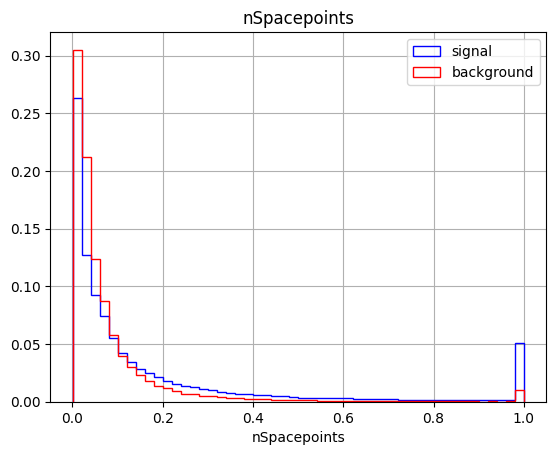

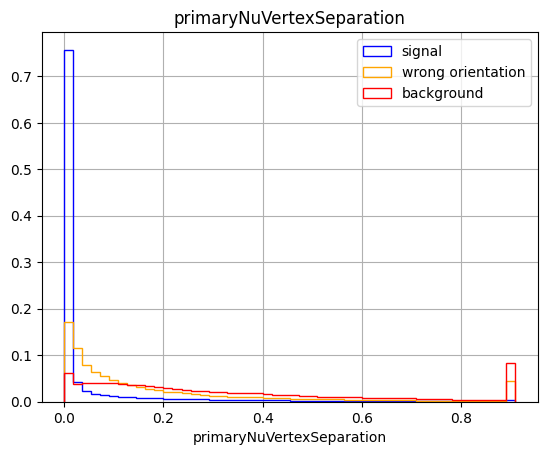

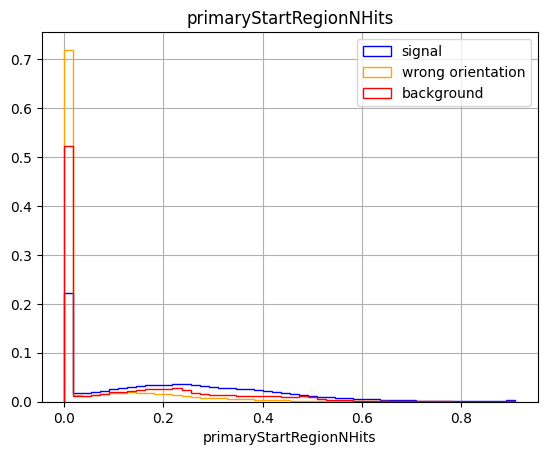

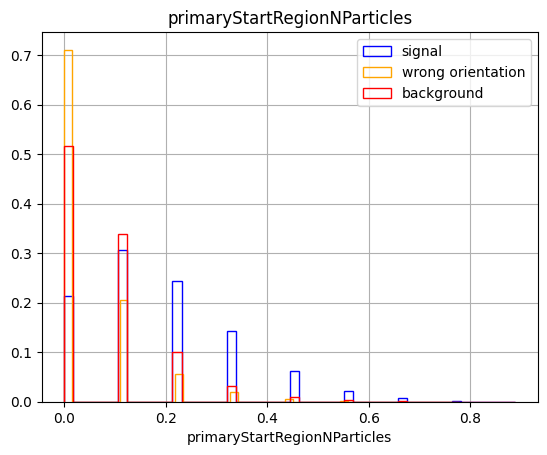

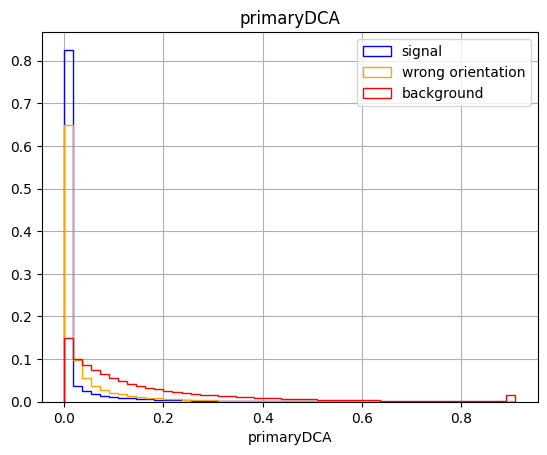

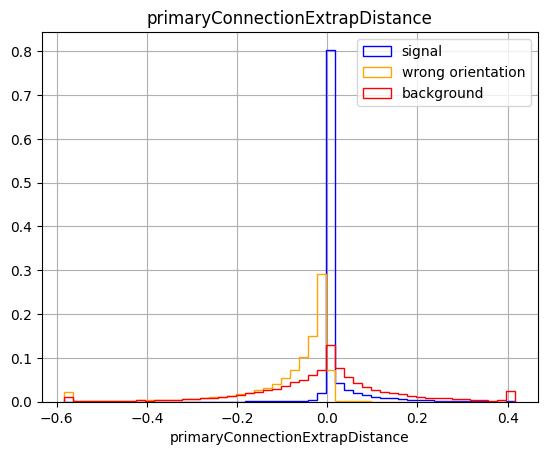

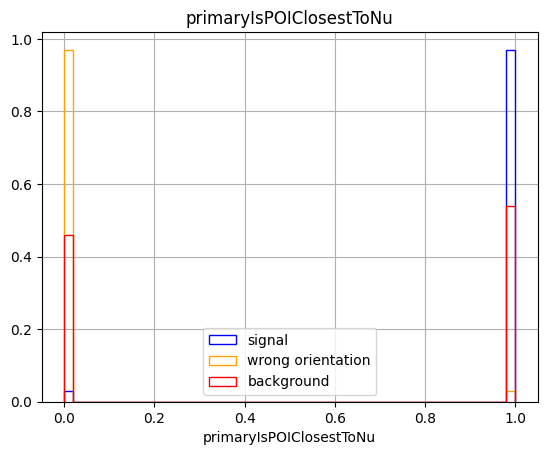

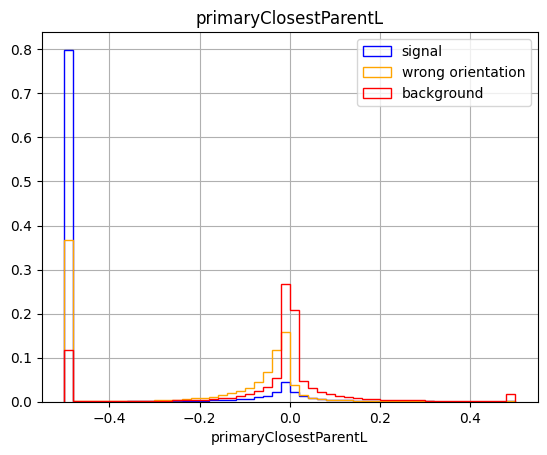

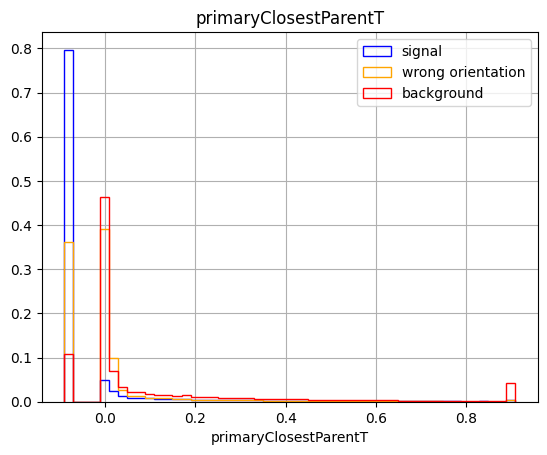

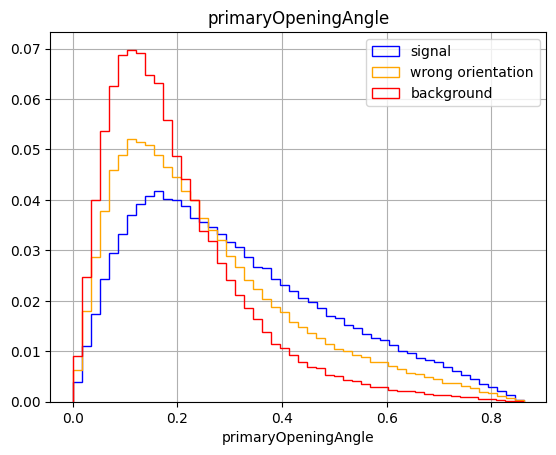

In [6]:
def drawSignalBackground(variable, truth_labels, graph_label) :
    
    signal_mask_vis = (truth_labels == 1).reshape(-1)
    background_mask_vis = (truth_labels == 0).reshape(-1)

    variable_signal = variable[signal_mask_vis].reshape(-1)
    variable_background = variable[background_mask_vis].reshape(-1)

    signal_weights = 1.0 / float(variable_signal.shape[0])
    signal_weights = np.ones(variable_signal.shape[0]) * signal_weights
    
    background_weights = 1.0 / float(variable_background.shape[0])
    background_weights = np.ones(variable_background.shape[0]) * background_weights   
        
    plt.hist(variable_signal, bins=50, color='blue', weights=signal_weights, label='signal', fill=False, histtype='step')
    plt.hist(variable_background, bins=50, color='red', weights=background_weights, label='background', fill=False, histtype='step')
    plt.title(graph_label)
    plt.xlabel(graph_label)
    plt.legend()
    plt.grid(True)
    plt.show()   

def drawSignalBackgroundGroup_track(variable0, variable1, truth_link_orientation, truth_is_correct, graph_label) :
    
    signal_mask_0 = np.logical_and((truth_link_orientation[:,0] == 1), truth_is_correct).reshape(-1)
    signal_mask_1 = np.logical_and((truth_link_orientation[:,1] == 1), truth_is_correct).reshape(-1)
    wo_mask_0 = np.logical_and((truth_link_orientation[:,0] == 0), truth_is_correct).reshape(-1)
    wo_mask_1 = np.logical_and((truth_link_orientation[:,1] == 0), truth_is_correct).reshape(-1)
    background_mask = (truth_is_correct == 0).reshape(-1)
    
    variable_signal_0 = variable0[signal_mask_0].reshape(-1)
    variable_signal_1 = variable1[signal_mask_1].reshape(-1)
    variable_wo_0 = variable0[wo_mask_0].reshape(-1)
    variable_wo_1 = variable1[wo_mask_1].reshape(-1)
    variable_background_0 = variable0[background_mask].reshape(-1)
    variable_background_1 = variable0[background_mask].reshape(-1)
    
    variable_signal = np.concatenate((variable_signal_0, variable_signal_1))
    variable_wo = np.concatenate((variable_wo_0, variable_wo_1))
    variable_background = np.concatenate((variable_background_0, variable_background_1))
    
    #variable_signal = variable_signal[variable_signal > -9000]
    #variable_wo = variable_wo[variable_wo > -9000]
    #variable_background = variable_background[variable_background > -9000]
    
    signal_weights = 1.0 / float(variable_signal.shape[0])
    signal_weights = np.ones(variable_signal.shape[0]) * signal_weights
    
    wo_weights = 1.0 / float(variable_wo.shape[0])
    wo_weights = np.ones(variable_wo.shape[0]) * wo_weights
    
    background_weights = 1.0 / float(variable_background.shape[0])
    background_weights = np.ones(variable_background.shape[0]) * background_weights  
        
    plt.hist(variable_signal, bins=50, color='blue', weights=signal_weights, label='signal', fill=False, histtype='step')
    plt.hist(variable_wo, bins=50, color='orange', weights=wo_weights, label='wrong orientation', fill=False, histtype='step')
    plt.hist(variable_background, bins=50, color='red', weights=background_weights, label='background', fill=False, histtype='step')
    plt.title(graph_label)
    plt.xlabel(graph_label)
    plt.legend()
    plt.grid(True)
    plt.show()   
    
drawSignalBackground(variables[:, 0], isTruePrimaryLink, "nSpacepoints")

if (isTrackMode) :
    drawSignalBackgroundGroup_track(variables[:, 1], variables[:, 10], isLinkOrientationCorrect, isTruePrimaryLink, 'primaryNuVertexSeparation')
    drawSignalBackgroundGroup_track(variables[:, 2], variables[:, 11], isLinkOrientationCorrect, isTruePrimaryLink, 'primaryStartRegionNHits')
    drawSignalBackgroundGroup_track(variables[:, 3], variables[:, 12], isLinkOrientationCorrect, isTruePrimaryLink, 'primaryStartRegionNParticles')    
    drawSignalBackgroundGroup_track(variables[:, 4], variables[:, 13], isLinkOrientationCorrect, isTruePrimaryLink, 'primaryDCA')    
    drawSignalBackgroundGroup_track(variables[:, 5], variables[:, 14], isLinkOrientationCorrect, isTruePrimaryLink, 'primaryConnectionExtrapDistance')   
    drawSignalBackgroundGroup_track(variables[:, 6], variables[:, 15], isLinkOrientationCorrect, isTruePrimaryLink, 'primaryIsPOIClosestToNu') 
    drawSignalBackgroundGroup_track(variables[:, 7], variables[:, 16], isLinkOrientationCorrect, isTruePrimaryLink, 'primaryClosestParentL') 
    drawSignalBackgroundGroup_track(variables[:, 8], variables[:, 17], isLinkOrientationCorrect, isTruePrimaryLink, 'primaryClosestParentT') 
    drawSignalBackgroundGroup_track(variables[:, 9], variables[:, 18], isLinkOrientationCorrect, isTruePrimaryLink, 'primaryOpeningAngle') 
else :
    drawSignalBackground(variables[:, 1], isTruePrimaryLink, 'primaryNuVertexSeparation')
    drawSignalBackground(variables[:, 2], isTruePrimaryLink, 'primaryStartRegionNHits')
    drawSignalBackground(variables[:, 3], isTruePrimaryLink, 'primaryStartRegionNParticles')    
    drawSignalBackground(variables[:, 4], isTruePrimaryLink, 'primaryDCA')    
    drawSignalBackground(variables[:, 5], isTruePrimaryLink, 'primaryConnectionExtrapDistance')
    drawSignalBackground(variables[:, 6], isTruePrimaryLink, 'primaryIsPOIClosestToNu')
    drawSignalBackground(variables[:, 7], isTruePrimaryLink, 'primaryClosestParentL') 
    drawSignalBackground(variables[:, 8], isTruePrimaryLink, 'primaryClosestParentT') 
    drawSignalBackground(variables[:, 9], isTruePrimaryLink, 'primaryOpeningAngle') 

In [7]:
trainingCutDCA = np.array(trainingCutDCA)

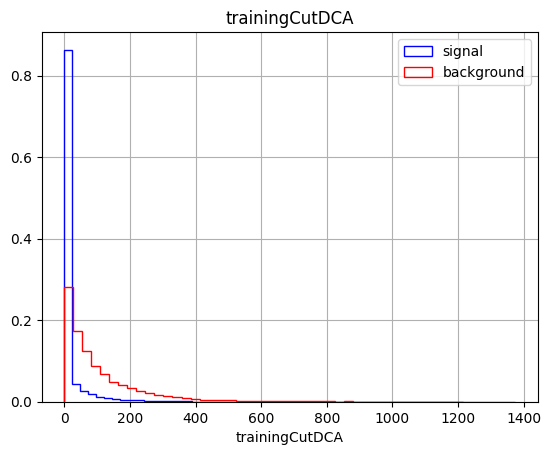

In [8]:
drawSignalBackground(trainingCutDCA, isTruePrimaryLink, "trainingCutDCA")

#100?

In [9]:
###########################################################
# This should shuffle things so that the indicies are still linked
###########################################################
variables, y, isTruePrimaryLink, trainingCutDCA, hasNeutronParent = sklearn.utils.shuffle(variables, y, isTruePrimaryLink, trainingCutDCA, hasNeutronParent)

In [10]:
###########################################################
# Write file
###########################################################

ntest = math.floor(nLinks * 0.1)
ntrain = math.floor(nLinks * 0.9)

print('ntest: ', ntest)
print('ntrain: ', ntrain)
    
variables_train = variables[:ntrain]
variables_test = variables[ntrain:]

y_train = y[:ntrain]
y_test = y[ntrain:]

isTruePrimaryLink_train = isTruePrimaryLink[:ntrain]
isTruePrimaryLink_test = isTruePrimaryLink[ntrain:]

trainingCutDCA_train = trainingCutDCA[:ntrain]
trainingCutDCA_test = trainingCutDCA[ntrain:]

hasNeutronParent_train = hasNeutronParent[:ntrain]
hasNeutronParent_test = hasNeutronParent[ntrain:]
    
np.savez(trainVarFile, variables_train=variables_train, y_train=y_train, isTruePrimaryLink_train=isTruePrimaryLink_train, trainingCutDCA_train=trainingCutDCA_train, hasNeutronParent_train=hasNeutronParent_train,
         variables_test=variables_test, y_test=y_test, isTruePrimaryLink_test=isTruePrimaryLink_test, trainingCutDCA_test=trainingCutDCA_test, hasNeutronParent_test=hasNeutronParent_test)

ntest:  22894
ntrain:  206051


In [11]:
print('variables_train: ', variables_train.shape)    
print('variables_test: ', variables_test.shape)  

print('y_train: ', y_train.shape)    
print('y_test: ', y_test.shape)  

print('isTruePrimaryLink_train:', isTruePrimaryLink_train.shape)
print('isTruePrimaryLink_test:', isTruePrimaryLink_test.shape)

print('hasNeutronParent_train:', hasNeutronParent_train.shape)
print('hasNeutronParent_test:', hasNeutronParent_test.shape)

variables_train:  (206051, 10)
variables_test:  (22895, 10)
y_train:  (206051,)
y_test:  (22895,)
isTruePrimaryLink_train: (206051,)
isTruePrimaryLink_test: (22895,)
hasNeutronParent_train: (206051,)
hasNeutronParent_test: (22895,)


In [12]:
# This might go wrong - pray for me.
# import copy

In [13]:
# primaryClosestParentL_min = -150.0
# primaryClosestParentL_max = 150.0

# primaryClosestParentL_1_copy = copy.deepcopy(variables[:, 7])
# primaryClosestParentL_2_copy = copy.deepcopy(variables[:, 16])

# drawSignalBackgroundGroup_track(primaryClosestParentL_1_copy, primaryClosestParentL_2_copy, isLinkOrientationCorrect, isTruePrimaryLink, 'primaryClosestParentL') 

# PrimaryTierFileHelper.normaliseXAxis(primaryClosestParentL_1_copy, primaryClosestParentL_min, primaryClosestParentL_max)
# PrimaryTierFileHelper.normaliseXAxis(primaryClosestParentL_2_copy, primaryClosestParentL_min, primaryClosestParentL_max)

# drawSignalBackgroundGroup_track(primaryClosestParentL_1_copy, primaryClosestParentL_2_copy, isLinkOrientationCorrect, isTruePrimaryLink, 'primaryClosestParentL') 

In [14]:
# primaryClosestParentT_min = -30.0
# primaryClosestParentT_max = 300.0

# primaryClosestParentT_1_copy = copy.deepcopy(variables[:, 8])
# primaryClosestParentT_2_copy = copy.deepcopy(variables[:, 17])

# drawSignalBackgroundGroup_track(primaryClosestParentT_1_copy, primaryClosestParentT_2_copy, isLinkOrientationCorrect, isTruePrimaryLink, 'primaryClosestParentT') 

# PrimaryTierFileHelper.normaliseXAxis(primaryClosestParentT_1_copy, primaryClosestParentT_min, primaryClosestParentT_max)
# PrimaryTierFileHelper.normaliseXAxis(primaryClosestParentT_2_copy, primaryClosestParentT_min, primaryClosestParentT_max)

# drawSignalBackgroundGroup_track(primaryClosestParentT_1_copy, primaryClosestParentT_2_copy, isLinkOrientationCorrect, isTruePrimaryLink, 'primaryClosestParentT') 

In [15]:
# primaryOpeningAngle_min = -0.5
# primaryOpeningAngle_max = 3.14

# primaryOpeningAngle_1_copy = copy.deepcopy(variables[:, 9])
# primaryOpeningAngle_2_copy = copy.deepcopy(variables[:, 18])

# drawSignalBackgroundGroup_track(primaryOpeningAngle_1_copy, primaryOpeningAngle_2_copy, isLinkOrientationCorrect, isTruePrimaryLink, 'primaryOpeningAngle') 

# PrimaryTierFileHelper.normaliseXAxis(primaryOpeningAngle_1_copy, primaryOpeningAngle_min, primaryOpeningAngle_max)
# PrimaryTierFileHelper.normaliseXAxis(primaryOpeningAngle_2_copy, primaryOpeningAngle_min, primaryOpeningAngle_max)

# drawSignalBackgroundGroup_track(primaryOpeningAngle_1_copy, primaryOpeningAngle_2_copy, isLinkOrientationCorrect, isTruePrimaryLink, 'primaryOpeningAngle') 

In [16]:
# Normalise things after the fact...

# for i in range(variables.shape[0]) :
#     variables[i][7] = primaryClosestParentL_1_copy[i]
#     variables[i][16] = primaryClosestParentL_2_copy[i]
    
#     variables[i][8] = primaryClosestParentT_1_copy[i]
#     variables[i][17] = primaryClosestParentT_2_copy[i]
    
#     variables[i][9] = primaryOpeningAngle_1_copy[i]
#     variables[i][18] = primaryOpeningAngle_2_copy[i]

In [17]:
# ###########################################################
# # Write file
# ###########################################################

# ntest = math.floor(nLinks * 0.1)
# ntrain = math.floor(nLinks * 0.9)

# print('ntest: ', ntest)
# print('ntrain: ', ntrain)
    
# variables_train = variables[:ntrain]
# variables_test = variables[ntrain:]

# y_train = y[:ntrain]
# y_test = y[ntrain:]

# isTruePrimaryLink_train = isTruePrimaryLink[:ntrain]
# isTruePrimaryLink_test = isTruePrimaryLink[ntrain:]

# trainingCutDCA_train = trainingCutDCA[:ntrain]
# trainingCutDCA_test = trainingCutDCA[ntrain:]
    
# np.savez(trainVarFile, variables_train=variables_train, y_train=y_train, isTruePrimaryLink_train=isTruePrimaryLink_train, trainingCutDCA_train=trainingCutDCA_train, 
#          variables_test=variables_test, y_test=y_test, isTruePrimaryLink_test=isTruePrimaryLink_test, trainingCutDCA_test=trainingCutDCA_test)